In [20]:
from collections import Counter, defaultdict
import re
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [69]:
MALE_PRONOUNS = ['he', 'him', 'his', 'himself']
FEMALE_PRONOUNS = ['she', 'her', 'hers', 'herself']

def is_gendered(sentence):
    sentence = sentence.lower()
    contains_male = any(re.search(r'\b{}\b'.format(m_pronoun), sentence) for m_pronoun in MALE_PRONOUNS)
    contains_female = any(re.search(r'\b{}\b'.format(f_pronoun), sentence) for f_pronoun in FEMALE_PRONOUNS)
    if contains_male and not contains_female:
        return "male"
    elif contains_female and not contains_male:
        return "female"
    return False

In [21]:
def get_source_target():
    with open(f'/home/jupyter/wikipedia_training/original/wikipedia_gendered.source', 'r') as f:
        source = f.readlines()
    
    with open(f'/home/jupyter/wikipedia_training/original/wikipedia_gendered.target', 'r') as f:
        target = f.readlines()
        
    return source, target

In [22]:
source, target = get_source_target()

In [23]:
len(source), len(target)

(15000000, 15000000)

In [76]:
source[0]

'In 1961, his single "Water Boy" reached No.\xa040 on the Billboard Hot\xa0100 and stayed on the chart for 14\xa0weeks.\n'

In [77]:
target[0]

'In 1961, theirs single "Water Boy" reached No.\xa040 on the Billboard Hot\xa0100 and stayed on the chart for 14\xa0weeks.\n'

In [70]:
%%time
male_count, female_count = 0, 0

for sent in source:
    gender = is_gendered(sent)
    if gender == 'male':
        male_count += 1
    if gender == 'female':
        female_count += 1

CPU times: user 5min 39s, sys: 12 ms, total: 5min 39s
Wall time: 5min 39s


In [74]:
male_count, round(male_count / len(source), 3)

(11809891, 0.787)

In [73]:
female_count, round(female_count / len(source), 3)

(3190109, 0.213)

In [75]:
male_count + female_count

15000000

In [29]:
token_counter = Counter()
total_tokens = 0

for sent in source[:]:
    tokens = sent.lower().split(' ')
    total_tokens += len(tokens)
    
    for token in tokens:
        token_counter[token] += 1

In [30]:
# num of unique tokens
len(token_counter)

5014477

In [33]:
print(total_tokens)
print(total_tokens / len(source))

328447567
21.896504466666666


In [35]:
token_counter.most_common(20)

[('the', 19414745),
 ('in', 11178846),
 ('of', 10260171),
 ('and', 9573120),
 ('he', 8482237),
 ('to', 7635958),
 ('a', 6938637),
 ('his', 6855281),
 ('was', 5143989),
 ('for', 3354429),
 ('as', 2989335),
 ('on', 2973571),
 ('with', 2697284),
 ('at', 2545867),
 ('she', 2266450),
 ('her', 2145373),
 ('that', 2033960),
 ('by', 1926537),
 ('from', 1810721),
 ('is', 1810617)]

In [36]:
def clean_str(word):
    pattern = re.compile("[^a-zA-Z']+", re.UNICODE)
    word = pattern.sub('', word)
    return word.lower()

In [37]:
%%time
change_type = Counter()
total_changes = 0

for source_sent, target_sent in zip(source, target):
    source_sent = source_sent.split(' ')
    target_sent = target_sent.split(' ')
    
    if len(source_sent) != len(target_sent):
        continue
        
    for i in range(len(source_sent)):
        if source_sent[i] != target_sent[i]:
            source_word = clean_str(source_sent[i])
            target_word = clean_str(target_sent[i])

            change_type[(source_word, target_word)] += 1
            
            total_changes += 1

CPU times: user 3min 25s, sys: 92 ms, total: 3min 25s
Wall time: 3min 25s


In [38]:
total_changes

26181989

In [39]:
print(len(change_type))
change_type.most_common(20)

20241


[(('he', 'they'), 8521905),
 (('his', 'their'), 6516893),
 (('was', 'were'), 2643267),
 (('she', 'they'), 2280794),
 (('her', 'their'), 1883143),
 (('him', 'them'), 1087349),
 (('is', 'are'), 724416),
 (('has', 'have'), 412245),
 (('his', 'theirs'), 358933),
 (('her', 'them'), 298315),
 (('himself', 'themself'), 276726),
 (('herself', 'themself'), 63996),
 (('chairman', 'chair'), 60067),
 (('does', 'do'), 26893),
 (("he's", "they're"), 25959),
 (('plays', 'play'), 16913),
 (('finds', 'find'), 15132),
 (('holds', 'hold'), 14773),
 (("she's", "they're"), 14664),
 (('works', 'work'), 14054)]

In [48]:
change_type_percent = Counter()
for change in change_type:
    change_type_percent[change] = '{:.3f}'.format(change_type[change] / total_changes)

In [49]:
change_type_percent.most_common(20)

[(('he', 'they'), '0.325'),
 (('his', 'their'), '0.249'),
 (('was', 'were'), '0.101'),
 (('she', 'they'), '0.087'),
 (('her', 'their'), '0.072'),
 (('him', 'them'), '0.042'),
 (('is', 'are'), '0.028'),
 (('has', 'have'), '0.016'),
 (('his', 'theirs'), '0.014'),
 (('her', 'them'), '0.011'),
 (('himself', 'themself'), '0.011'),
 (('chairman', 'chair'), '0.002'),
 (('herself', 'themself'), '0.002'),
 (('plays', 'play'), '0.001'),
 (("he's", "they're"), '0.001'),
 (('holds', 'hold'), '0.001'),
 (('does', 'do'), '0.001'),
 (('lives', 'live'), '0.001'),
 (('finds', 'find'), '0.001'),
 (('works', 'work'), '0.001')]

In [50]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''

In [58]:
labels = [change[0] for change in change_type.most_common(1000)]
sizes = [change[1] for change in change_type.most_common(1000)]

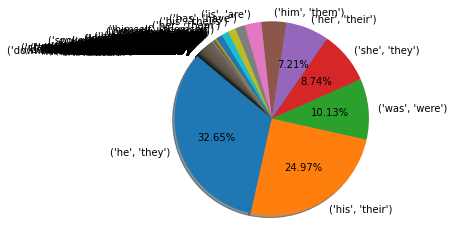

In [59]:
plt.pie(sizes, labels=labels,
autopct=my_autopct, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [60]:
change_type_percent.most_common(20)

[(('he', 'they'), '0.325'),
 (('his', 'their'), '0.249'),
 (('was', 'were'), '0.101'),
 (('she', 'they'), '0.087'),
 (('her', 'their'), '0.072'),
 (('him', 'them'), '0.042'),
 (('is', 'are'), '0.028'),
 (('has', 'have'), '0.016'),
 (('his', 'theirs'), '0.014'),
 (('her', 'them'), '0.011'),
 (('himself', 'themself'), '0.011'),
 (('chairman', 'chair'), '0.002'),
 (('herself', 'themself'), '0.002'),
 (('plays', 'play'), '0.001'),
 (("he's", "they're"), '0.001'),
 (('holds', 'hold'), '0.001'),
 (('does', 'do'), '0.001'),
 (('lives', 'live'), '0.001'),
 (('finds', 'find'), '0.001'),
 (('works', 'work'), '0.001')]

In [64]:
# male
male_pairs = [('he', 'they'), ('his', 'their'), ('him', 'them'), ('his', 'theirs'), ('himself', 'themself'), ("he's", "they're")]
male_percent = 0

for pair in male_pairs:
    if pair in change_type_percent:
        male_percent += float(change_type_percent[pair])

round(male_percent, 3)

0.641

In [65]:
# female
female_pairs = [('she', 'they'), ('her', 'their'), ('her', 'them'), ('hers', 'theirs'), ('herself', 'themself'), ("she's", "they're")]
female_percent = 0

for pair in female_pairs:
    if pair in change_type_percent:
        female_percent += float(change_type_percent[pair])

round(female_percent, 3)

0.173

In [67]:
other = round(1 - male_percent - female_percent, 2)
other

0.19